# Carga de datos


In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/titanic_train.csv'

df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Limpieza de Datos

In [6]:
#Cambiamos las columnas en minusculas sustituir espacios por guiones bajos.
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Búsqueda de duplicados.
df.duplicated().sum()

np.int64(0)

In [9]:
#Valores nulos.

df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0


In [10]:
df['age'].isna().sum()

np.int64(177)

In [11]:
# imputamos edad usando las columnas con relacion directa ocupando lambda

df['age'] = df.groupby('pclass')['age'].transform(lambda x: x.fillna(x.mean()))

df.isna().sum()


,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [12]:
df['age'].value_counts()

,count
age,
25.140620,136
38.233441,30
24.000000,30
22.000000,27
18.000000,26
...,...
24.500000,1
0.670000,1
0.420000,1


In [13]:
df[df['age'] < 1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


Se observan edades menores a 1 , pero bajo el contexto se entiende que problablemente son niños que no habian cumplido aún su primer año de edad.

In [14]:
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


Se observa que los datos faltantes de la columna Cabin superan el 50% por lo tanto se procede a dropear columna.

In [15]:
#dropeamos cabin column

df = df.drop('cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [17]:
# Imputar columna embarked
df['embarked'] = df.groupby('pclass')['embarked'].transform(lambda x: x.fillna(x.mode()[0]))
df.isna().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [18]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


No se nota ningun valor atipico procedemos a genberar la visualizaciones


# Visualizaciones

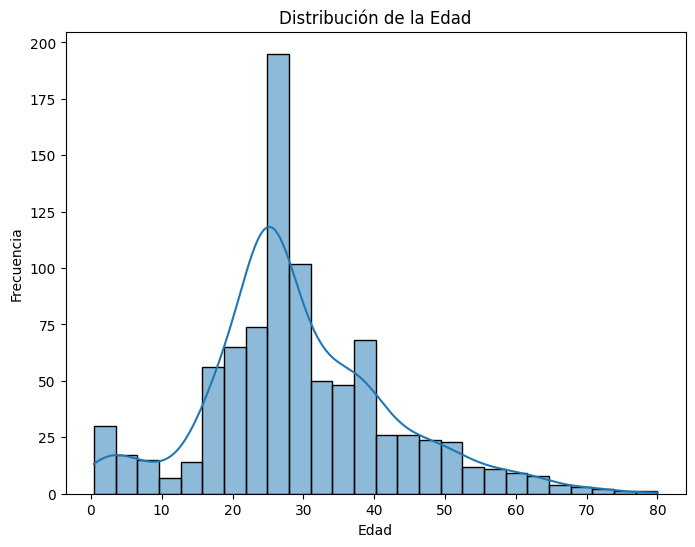

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [20]:
print("""
Análisis del Histograma de la Edad:
- El histograma muestra la distribución de la edad de los pasajeros.
- La mayoría de los pasajeros se encuentran en el rango de edad de 20 a 40 años.
- Se observa una concentración de pasajeros jóvenes.
- La distribución parece tener una ligera cola hacia la derecha, indicando la presencia de algunos pasajeros de mayor edad.
- El pico más alto se encuentra alrededor de los 25-30 años.
- La curva de densidad estimada (kde) confirma la forma de la distribución, mostrando una clara moda en el rango mencionado.
""")



Análisis del Histograma de la Edad:
- El histograma muestra la distribución de la edad de los pasajeros.
- La mayoría de los pasajeros se encuentran en el rango de edad de 20 a 40 años.
- Se observa una concentración de pasajeros jóvenes.
- La distribución parece tener una ligera cola hacia la derecha, indicando la presencia de algunos pasajeros de mayor edad.
- El pico más alto se encuentra alrededor de los 25-30 años.
- La curva de densidad estimada (kde) confirma la forma de la distribución, mostrando una clara moda en el rango mencionado.



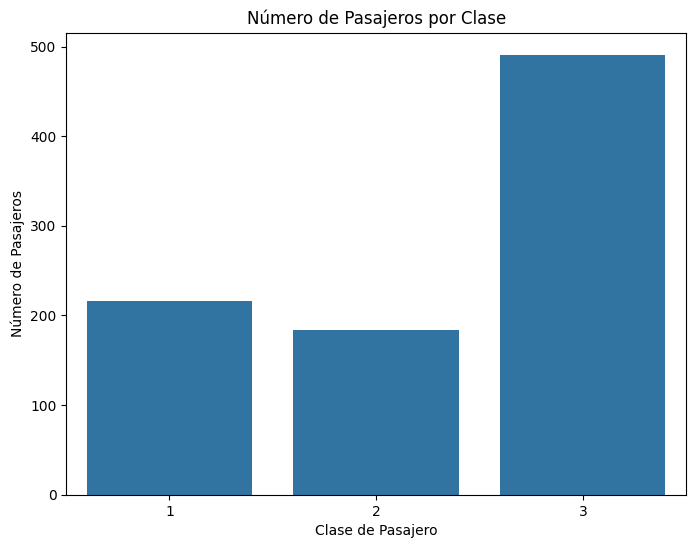

In [21]:
# Gráfico de barras de la clase de pasajero
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Número de Pasajeros por Clase')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Pasajeros')
plt.show()

In [22]:
print("""
Análisis del Gráfico de Barras del Número de Pasajeros por Clase:
- La clase 3 es la que tiene el mayor número de pasajeros, lo cual es evidente por la barra más alta.
- Esto sugiere que la mayoría de los pasajeros en el conjunto de datos viajaban en tercera clase.

""")



Análisis del Gráfico de Barras del Número de Pasajeros por Clase:
- La clase 3 es la que tiene el mayor número de pasajeros, lo cual es evidente por la barra más alta.
- Esto sugiere que la mayoría de los pasajeros en el conjunto de datos viajaban en tercera clase.




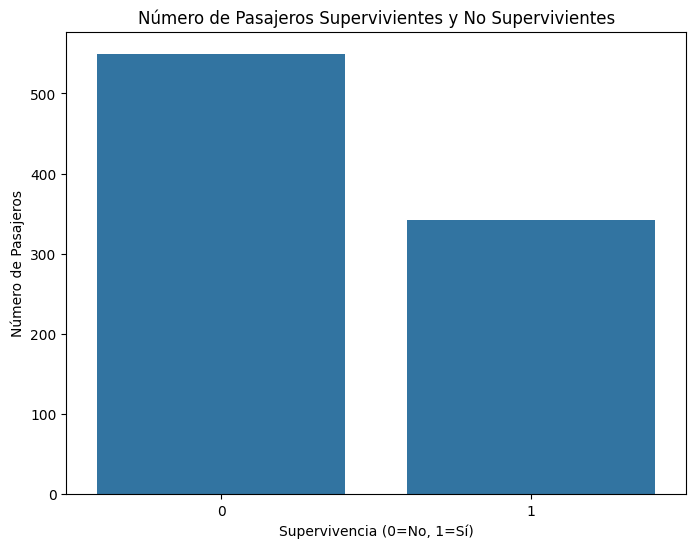

In [23]:
# Gráfico de barras de supervivencia
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.title('Número de Pasajeros Supervivientes y No Supervivientes')
plt.xlabel('Supervivencia (0=No, 1=Sí)')
plt.ylabel('Número de Pasajeros')
plt.show()


In [24]:
survived_counts = df['survived'].value_counts()

print("Análisis del Gráfico de Barras de Supervivencia:")
print(f"- Número de pasajeros no supervivientes (0): {survived_counts.get(0, 0)}")
print(f"- Número de pasajeros supervivientes (1): {survived_counts.get(1, 0)}")
print("- Es mayor la cantidad de pasajeros que no sobrevivieron")


Análisis del Gráfico de Barras de Supervivencia:
- Número de pasajeros no supervivientes (0): 549
- Número de pasajeros supervivientes (1): 342
- Es mayor la cantidad de pasajeros que no sobrevivieron


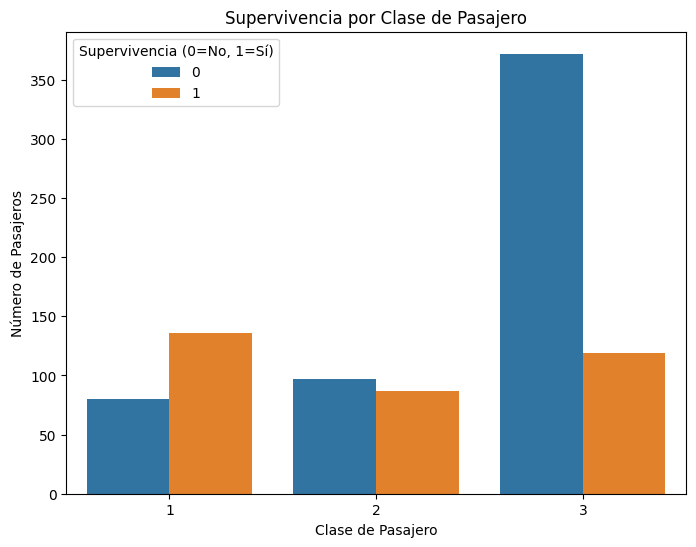

In [25]:
# Gráfico de barras de supervivencia por clase
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Supervivencia por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Supervivencia (0=No, 1=Sí)')
plt.show()

In [26]:
print("""
Análisis del Gráfico de Barras de Supervivencia por Clase:
- El gráfico muestra el número de pasajeros que sobrevivieron (1) y no sobrevivieron (0) dentro de cada clase (1, 2 y 3).
- Se observa que en la Clase 1, la mayoría de los pasajeros sobrevivieron. La barra azul (supervivientes) es significativamente más alta que la barra naranja (no supervivientes).
- En la Clase 2, la proporción de supervivientes y no supervivientes es más equilibrada, aunque hay ligeramente más no supervivientes.
- En la Clase 3, una gran mayoría de los pasajeros no sobrevivieron. La barra naranja (no supervivientes) es mucho más alta que la barra azul (supervivientes).
- Este gráfico sugiere una fuerte correlación entre la clase de pasajero y la probabilidad de supervivencia, siendo los pasajeros de primera clase quienes tuvieron una mayor tasa de supervivencia.
""")


Análisis del Gráfico de Barras de Supervivencia por Clase:
- El gráfico muestra el número de pasajeros que sobrevivieron (1) y no sobrevivieron (0) dentro de cada clase (1, 2 y 3).
- Se observa que en la Clase 1, la mayoría de los pasajeros sobrevivieron. La barra azul (supervivientes) es significativamente más alta que la barra naranja (no supervivientes).
- En la Clase 2, la proporción de supervivientes y no supervivientes es más equilibrada, aunque hay ligeramente más no supervivientes.
- En la Clase 3, una gran mayoría de los pasajeros no sobrevivieron. La barra naranja (no supervivientes) es mucho más alta que la barra azul (supervivientes).
- Este gráfico sugiere una fuerte correlación entre la clase de pasajero y la probabilidad de supervivencia, siendo los pasajeros de primera clase quienes tuvieron una mayor tasa de supervivencia.



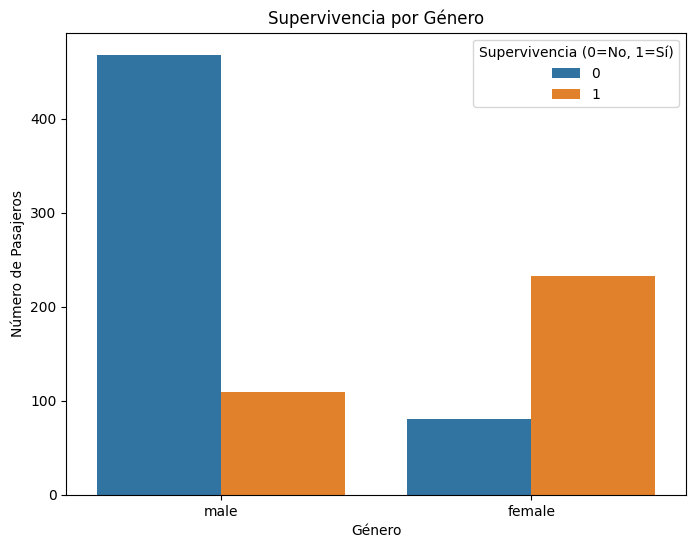

In [27]:
# Gráfico de barras de supervivencia por género
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Supervivencia (0=No, 1=Sí)')
plt.show()

In [28]:

gender_survival = df.groupby('sex')['survived'].value_counts().unstack().fillna(0)

print("Análisis del Gráfico de Barras de Supervivencia por Género:")
print(f"- Número de mujeres no supervivientes: {gender_survival.loc['female', 0.0]}")
print(f"- Número de mujeres supervivientes: {gender_survival.loc['female', 1.0]}")
print(f"- Número de hombres no supervivientes: {gender_survival.loc['male', 0.0]}")
print(f"- Número de hombres supervivientes: {gender_survival.loc['male', 1.0]}")
print("- Se observa una diferencia significativa en las tasas de supervivencia entre géneros.")
print("- Un número considerablemente mayor de mujeres sobrevivió en comparación con los hombres.")
print("- Es probable que se diera prioridad a las mujeres durante la evacuación.")

Análisis del Gráfico de Barras de Supervivencia por Género:
- Número de mujeres no supervivientes: 81
- Número de mujeres supervivientes: 233
- Número de hombres no supervivientes: 468
- Número de hombres supervivientes: 109
- Se observa una diferencia significativa en las tasas de supervivencia entre géneros.
- Un número considerablemente mayor de mujeres sobrevivió en comparación con los hombres.
- Es probable que se diera prioridad a las mujeres durante la evacuación.


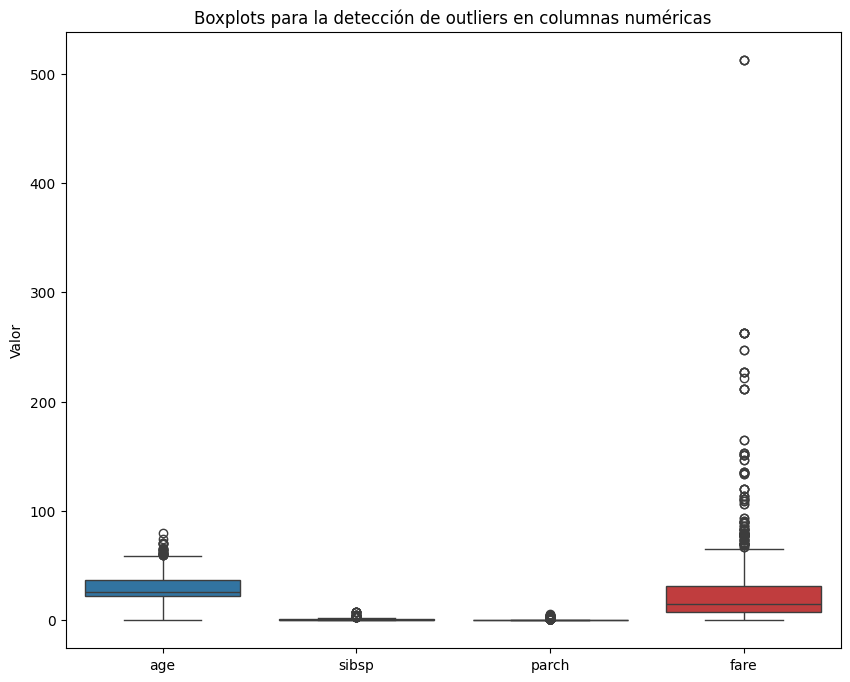

In [29]:
# Análisis de outliers usando boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['age', 'sibsp', 'parch', 'fare']])
plt.title('Boxplots para la detección de outliers en columnas numéricas')
plt.ylabel('Valor')
plt.show()

In [30]:
print("""
Análisis de Outliers usando Boxplots:
- Los boxplots muestran la distribución y posibles outliers en las columnas numéricas 'age', 'sibsp', 'parch', y 'fare'.
- En 'age', se observan algunos puntos fuera del rango de los bigotes, indicando la presencia de pasajeros con edades inusualmente altas.
- En 'sibsp' (número de hermanos/cónyuges a bordo), se observan muchos puntos por encima del bigote superior, lo que sugiere la presencia de familias con un gran número de hermanos/cónyuges.
- En 'parch' (número de padres/hijos a bordo), también se ven puntos por encima del bigote superior, indicando familias con un número elevado de padres/hijos.
- La columna 'fare' muestra una gran cantidad de outliers extremos en la parte superior, lo que indica la presencia de tarifas muy altas, probablemente asociadas a pasajeros de primera clase o grupos grandes.
""")


Análisis de Outliers usando Boxplots:
- Los boxplots muestran la distribución y posibles outliers en las columnas numéricas 'age', 'sibsp', 'parch', y 'fare'.
- En 'age', se observan algunos puntos fuera del rango de los bigotes, indicando la presencia de pasajeros con edades inusualmente altas.
- En 'sibsp' (número de hermanos/cónyuges a bordo), se observan muchos puntos por encima del bigote superior, lo que sugiere la presencia de familias con un gran número de hermanos/cónyuges.
- En 'parch' (número de padres/hijos a bordo), también se ven puntos por encima del bigote superior, indicando familias con un número elevado de padres/hijos.
- La columna 'fare' muestra una gran cantidad de outliers extremos en la parte superior, lo que indica la presencia de tarifas muy altas, probablemente asociadas a pasajeros de primera clase o grupos grandes.



# Preprocesamiento

In [31]:
# Definir features y target
X = df.drop(columns=['survived', 'passengerid', 'name', 'ticket'])
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,  stratify=y)

# Define numeric and categorical features
numeric_features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
categorical_features = ['sex', 'embarked']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Modelos

In [32]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV


# 2. DICCIONARIO DE MODELOS (nomenclatura corregida)
model_params = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9, 11],
            "model__weights": ["uniform", "distance"],
            'model__p': [1],  # 1: Manhattan distance
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__class_weight": ["balanced", None],
            "model__n_estimators": [50, 100, 150],
            "model__max_depth":  [5, 7, None],
            "model__min_samples_split": [5, 10, 15]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
             'model__C': [0.001, 0.01, 0.1, 1, 10],
             'model__penalty': ['l2'],
             'model__class_weight': [None, 'balanced']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric='logloss'),
        "params": {
            "model__max_depth": [3, 5],
            "model__learning_rate": [0.01, 0.05, 0.1],  # Valores más bajos
            "model__subsample": [0.7, 0.9],  # Prevenir overfitting
            "model__min_child_weight": [1, 3],  # Controlar splits
            "model__scale_pos_weight": [1, 2, 3]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            'model__num_leaves': [15, 31],  # Reducir complejidad
            'model__min_data_in_leaf': [20, 50],  # Evitar splits no informativos
            'model__bagging_freq': [5],  # Frecuencia de bagging
            'model__feature_fraction': [0.7, 0.9],  # Reducción de features
            'model__verbose': [-1]  # Silenciar warnings
        }
    }
}

# 3. ENTRENAMIENTO CON PIPELINE INTEGRADO
best_models = {}
for name, config in model_params.items():
    print(f"\n=== Entrenando {name} ===")

    # Pipeline completo con ColumnTransformer
    full_pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Tu ColumnTransformer
        ('model', config['model'])       # Modelo actual
    ])

    grid = GridSearchCV(
        full_pipeline,
        param_grid=config['params'],
        cv=5,
         scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_models[name] = {
        'model': grid.best_estimator_,
        'params': grid.best_params_,
        'score': grid.best_score_
    }

    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Accuracy (val): {grid.best_score_:.4f}")



=== Entrenando KNN ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'uniform'}
Accuracy (val): 0.7497

=== Entrenando RandomForest ===
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros: {'model__class_weight': 'balanced', 'model__max_depth': 7, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Accuracy (val): 0.7597

=== Entrenando LogisticRegression ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l2'}
Accuracy (val): 0.7385

=== Entrenando XGBoost ===
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__scale_pos_weight': 1, 'model__subsample': 0.9}
Accuracy (val): 0.7587

=== Entrenando LightGBM ===
Fitting 5 folds for each of

# Metricas

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluar_modelo_titanic(modelo, X_test, y_test, nombre_modelo):
    """
    Evalúa un modelo de clasificación para el dataset del Titanic
    """
    # Predicciones
    y_pred = modelo.predict(X_test)

    # Verificar si el modelo tiene predict_proba (para ROC-AUC)
    has_proba = hasattr(modelo, 'predict_proba')
    y_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular métricas
    metricas = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

    # Matriz de confusión
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Sobrevivió', 'Sobrevivió'],
                yticklabels=['No Sobrevivió', 'Sobrevivió'])
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

    # Curva ROC (solo si el modelo tiene predict_proba)
    if has_proba:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {nombre_modelo}')
        plt.legend(loc="lower right")
        plt.show()

    # Mostrar métricas
    print(f"\n{'='*40}")
    print(f"EVALUACIÓN DE {nombre_modelo.upper()}")
    print(f"{'='*40}")
    for nombre, valor in metricas.items():
        if valor is not None:
            print(f"{nombre:<12}: {valor:.4f}")
        else:
            print(f"{nombre:<12}: No disponible")
    print(f"{'='*40}")

    return metricas

# Resultados finales



COMPARACIÓN FINAL DE MODELOS - TITANIC


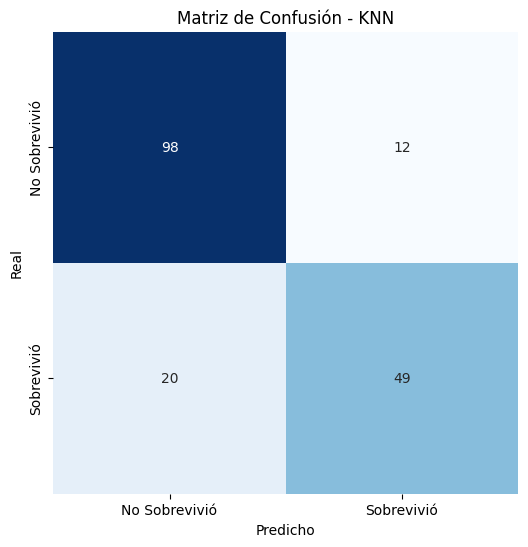

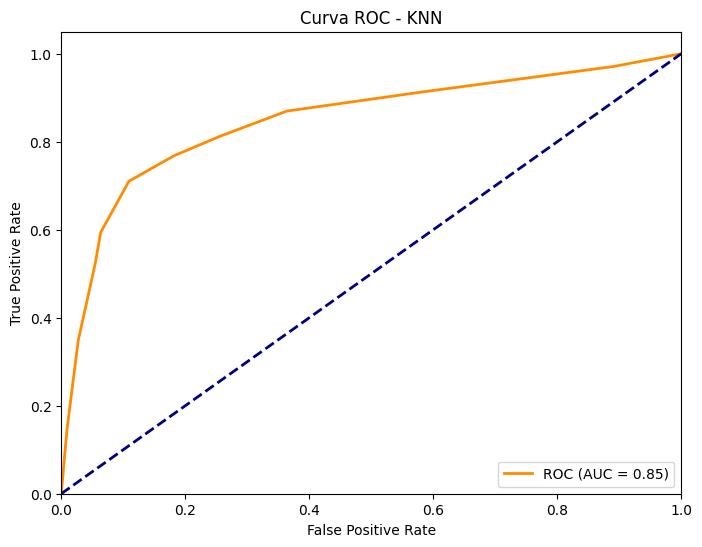


EVALUACIÓN DE KNN
Accuracy    : 0.8212
Precision   : 0.8033
Recall      : 0.7101
F1-Score    : 0.7538
ROC-AUC     : 0.8478


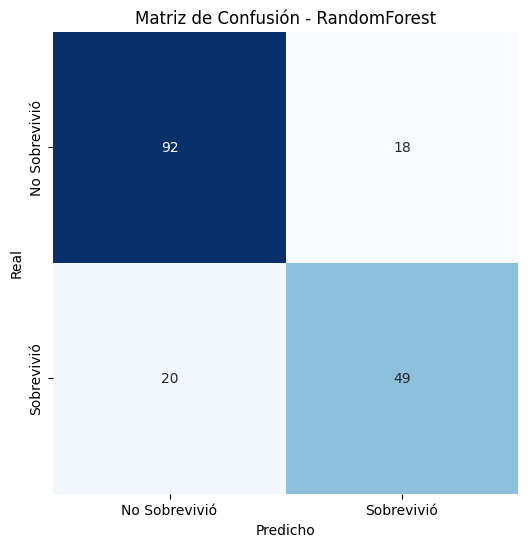

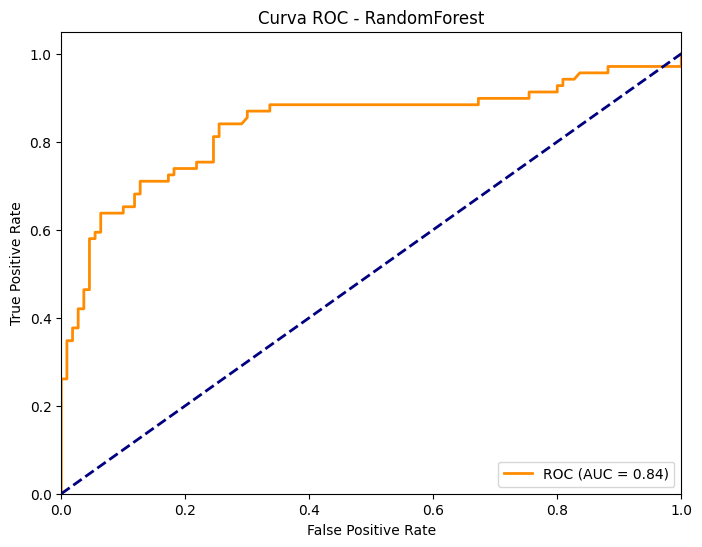


EVALUACIÓN DE RANDOMFOREST
Accuracy    : 0.7877
Precision   : 0.7313
Recall      : 0.7101
F1-Score    : 0.7206
ROC-AUC     : 0.8373


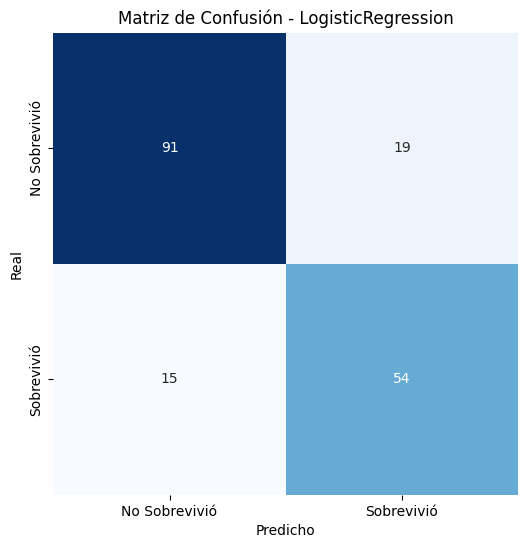

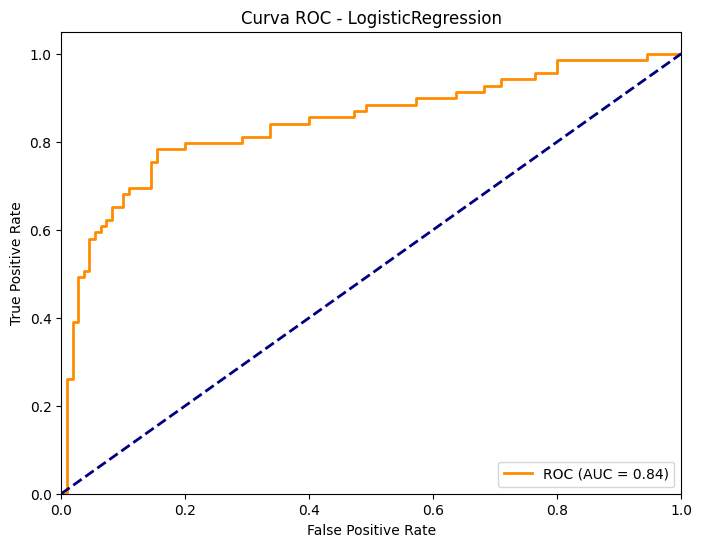


EVALUACIÓN DE LOGISTICREGRESSION
Accuracy    : 0.8101
Precision   : 0.7397
Recall      : 0.7826
F1-Score    : 0.7606
ROC-AUC     : 0.8439


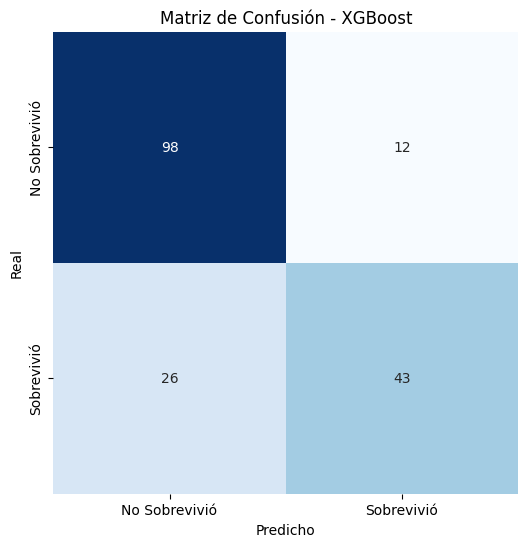

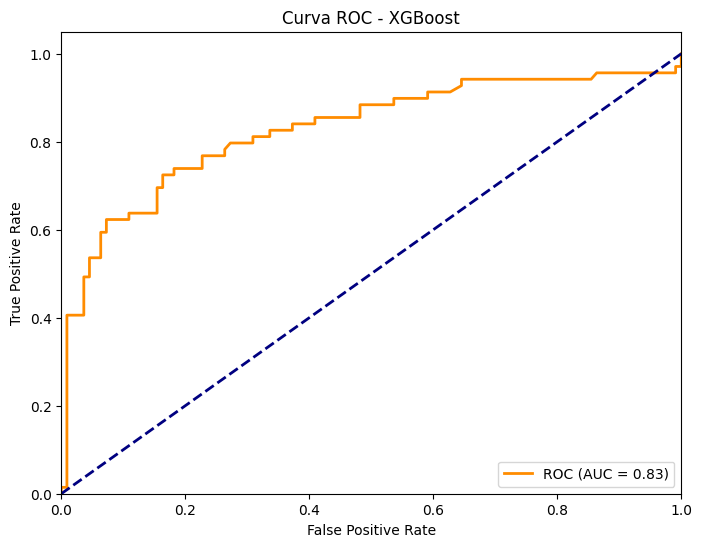


EVALUACIÓN DE XGBOOST
Accuracy    : 0.7877
Precision   : 0.7818
Recall      : 0.6232
F1-Score    : 0.6935
ROC-AUC     : 0.8279


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


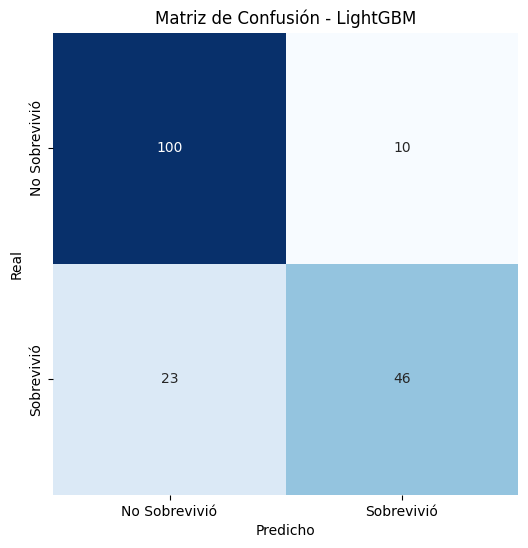

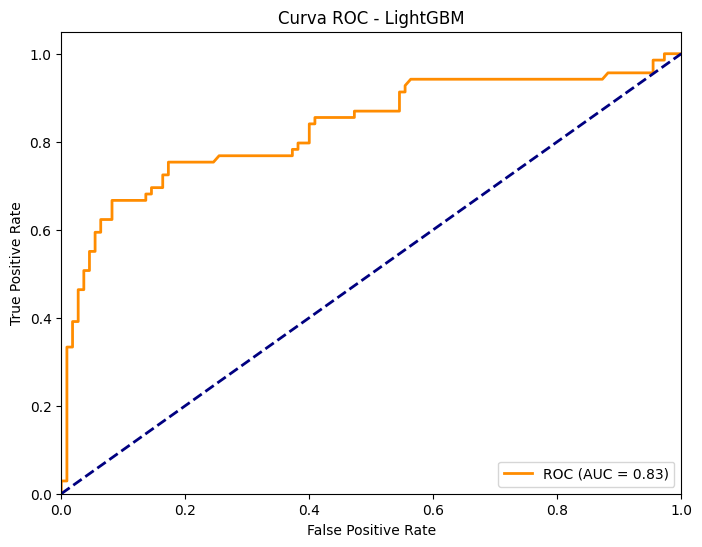


EVALUACIÓN DE LIGHTGBM
Accuracy    : 0.8156
Precision   : 0.8214
Recall      : 0.6667
F1-Score    : 0.7360
ROC-AUC     : 0.8300

Resumen comparativo:
                    Accuracy  Precision  Recall  F1-Score  ROC-AUC
KNN                   0.8212     0.8033  0.7101    0.7538   0.8478
RandomForest          0.7877     0.7313  0.7101    0.7206   0.8373
LogisticRegression    0.8101     0.7397  0.7826    0.7606   0.8439
XGBoost               0.7877     0.7818  0.6232    0.6935   0.8279
LightGBM              0.8156     0.8214  0.6667    0.7360   0.8300


<Figure size 1200x600 with 0 Axes>

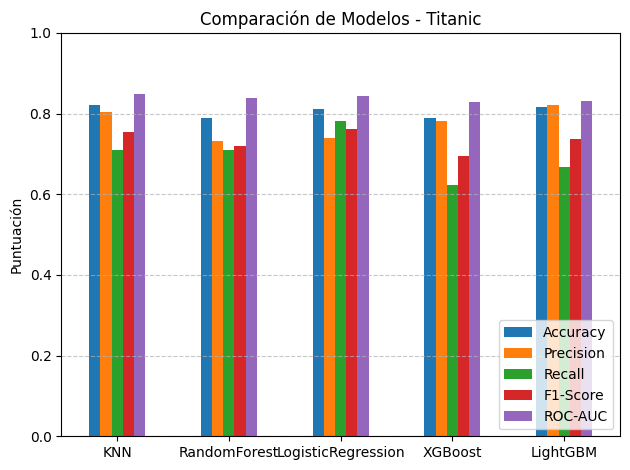

In [34]:
# ---------------------------------------------------------------
# COMPARACIÓN FINAL DE MODELOS PARA TITANIC
# ---------------------------------------------------------------
print("\n" + "="*50)
print("COMPARACIÓN FINAL DE MODELOS - TITANIC")
print("="*50)

# Evaluar todos los modelos y recolectar resultados
resultados = {}
for name, model_info in best_models.items():
    resultados[name] = evaluar_modelo_titanic(
        model_info['model'],
        X_test,
        y_test,
        name
    )

# Crear DataFrame comparativo
resultados_df = pd.DataFrame(resultados).T
print("\nResumen comparativo:")
print(resultados_df.round(4))

# Gráfico de comparación
plt.figure(figsize=(12, 6))
resultados_df.plot(kind='bar', rot=0)
plt.title('Comparación de Modelos - Titanic')
plt.ylabel('Puntuación')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusiones Finales

In [35]:
print("========================================")
print("      CONCLUSIONES DEL BENCHMARK       ")
print("========================================")
print("1. **Mejor Accuracy y ROC-AUC**: KNN (82.12% / 84.78%)")
print("   - Modelo más equilibrado en rendimiento general")
print("2. **Mejor Precision**: LightGBM (82.14%)")
print("   - Ideal para evitar falsos positivos (ej: spam)")
print("3. **Mejor balance Recall/Precision**: Logistic Regression (F1: 76.06%)")
print("   - Óptimo para problemas sensibles (ej: diagnósticos)")
print("4. **Trade-offs clave**:")
print("   - LightGBM: Alta Precision pero bajo Recall (66.67%)")
print("   - XGBoost: Similar a LightGBM pero con mejor Recall")
print("5. **Peor desempeño**: Random Forest (Accuracy: 78.77%)")
print("   - Posible overfitting o necesidad de ajuste de hiperparámetros")
print("========================================")
print("RECOMENDACIONES FINALES:")
print("- Uso empresarial (ej: CRM)  --> LightGBM (Precision)")
print("- Uso sanitario (ej: pruebas) --> Logistic Regression (Recall)")
print("- Balance general           --> KNN (Accuracy/ROC-AUC)")
print("========================================")

      CONCLUSIONES DEL BENCHMARK       
1. **Mejor Accuracy y ROC-AUC**: KNN (82.12% / 84.78%)
   - Modelo más equilibrado en rendimiento general
2. **Mejor Precision**: LightGBM (82.14%)
   - Ideal para evitar falsos positivos (ej: spam)
3. **Mejor balance Recall/Precision**: Logistic Regression (F1: 76.06%)
   - Óptimo para problemas sensibles (ej: diagnósticos)
4. **Trade-offs clave**:
   - LightGBM: Alta Precision pero bajo Recall (66.67%)
   - XGBoost: Similar a LightGBM pero con mejor Recall
5. **Peor desempeño**: Random Forest (Accuracy: 78.77%)
   - Posible overfitting o necesidad de ajuste de hiperparámetros
RECOMENDACIONES FINALES:
- Uso empresarial (ej: CRM)  --> LightGBM (Precision)
- Uso sanitario (ej: pruebas) --> Logistic Regression (Recall)
- Balance general           --> KNN (Accuracy/ROC-AUC)
